# REF3: CSE575- Project 2: K Means Clustering

STUDENT: Francis Mendoza

ASUID: 1213055998

EMAIL: fmendoz7@asu.edu

---------------------------------------------------------------------------------------------
#### STRATEGY 1: Randomly picking initial centers


#### STRATEGY 2: First Center Random, Then Maximum Equidistance
    1. k lists for k centroids 
    2. Basically, find the largest distnace from the initial point, pick that as your centroid
    3. Continue to populate 

#### IMPORTANT POINTS
    1. Clusters need to work from 2-10
    2. Plot Objective Function value vs. Number Of Clusters, k
    3. Plot Objective Function TWICE under EACH STRATEGY (each start under different 
    initialization,  to smooth out any discrepancies from the first run)
    
#### (!!!) NEED TO PLOT THE LOSS VS K

In [420]:
import scipy.io
import numpy as np
import random # for alternative approach for #1
import matplotlib.pyplot as plt, mpld3
from matplotlib import style

style.use('ggplot')

In [421]:
Numpyfile = scipy.io.loadmat('AllSamples.mat')

# Return as numpy array
coordinatesArr = Numpyfile['AllSamples']
#coordinatesArr

### STRATEGY 1 IMPLEMENTATION

In [422]:
class K_Means1:
    # Constructor
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
#-----------------------------------------------------------------------------------------------------------------    
    # Distance Metric we use
    def Euclidean_distance(feat_one, feat_two):
        squared_distance = 0
        
        # Lengths of two features must be the same
        for i in range(len(feat_one)):
            squared_distance += (feat_one[i] - feat_two[i])**2
        
        ed = sqrt(squared_distance)
        return ed;
    
    # Global Boolean Values To Switch Strategy 1 and Strategy 2
    strat1Bool = False
    strat2Bool = False
#-----------------------------------------------------------------------------------------------------------------    
    # (!!!) STRATEGY 1: Initialize Centroids Randomly
    def centroidInit_Strat1(self, coordinatesArr):
        self.centroids = {}
        self.objectivelst = []
        self.flatList = []
        
        #(!!!)
        self.objectiveDict = {}
        
        yValueObjective = 0
        
        # STEP 1: Randomize Initial Centroids
        for i in range(self.k):
            # Taking first k centroids is a valid way to randomize?
            self.centroids[i] = coordinatesArr[i]
            
        """# Alternative Way to Randomize Initial Centroids, using Python Randomness Library
        for i in range(self.k):
            self.centroids[i] = random.choice(coordinatesArr)"""
            
        # STEP 2: Begin Iterations
        for i in range(self.max_iterations):
            
            # Dictionary to store points depending on {classification: coordinates}
            self.classes = {}
            
            #(!!!) localSum to sum all the values 
            localSum = 0 
            
            # Initialize Null Dictionary for classes and objective dictionary values
            for i in range(self.k):
                self.classes[i] = []
                self.objectiveDict[i] = []
            
            # STEP 3: Calculate Euclidean Distance Between Point And Cluster
            for points in coordinatesArr: 
                # 'points' have (x, y) form, calculate distance with respect to EACH centroid
                distances = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
                
                # Take the MINIMUM of the distance of EVERY SINGLE POINT respective to that node
                classification = distances.index(min(distances))
                self.classes[classification].append(points)

            previous = dict(self.centroids)

            # STEP 4: Recalcualte Centroids For Next Run
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True
            
            # STEP 5: Break Out Of Main Loop If Results Are Optimal
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.00) > self.tolerance:
                    isOptimal = False
                    
            if isOptimal == True:
                break
                
        # STEP 6: Plot Objective Function For Each k
        totalSum = 0
        
        # Iterate through every class 
        for classification in self.classes:
            
            # (!!!) Calculate distance for all points within that classification, sum them up into one value
            temp = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
            localSum = sum(temp)
            
            # Add localSum to totalSum
            totalSum += localSum
            
            # Append totalSum (objective value of k including all those before it)
            self.objectiveDict[classification].append(totalSum)
            
        self.objectivelst = list(self.objectiveDict.values()) 
        
        for sublist in self.objectivelst:
            for item in sublist:
                self.flatList.append(item)
                
        #print("SHAPE OF CLASSES: ", len(self.classes))
        #print("SHAPE OF FLATLIST: ", len(self.flatList))
        print("SUCCESSIVE OBJECTIVE VALUES: ", self.flatList)
        
        print("//////////////////////////////////////////////////")
#-----------------------------------------------------------------------------------------------------------------
    def pred(self, coordinatesArr):
        distances = [np.linalg.norm(coordinatesArr - self.centroids[centroid] for centroid in self.centroids)]
        classification = distances.index(min(distances))
        return classification
#-----------------------------------------------------------------------------------------------------------------

In [423]:
# HELPER METHOD: Execute Strategy No.1 Exclusively
def strategy1_execute(X1, a):
    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for i in range(2,11):
        print("Initialization #", a)
        print("STRATEGY # 1: Clusters = ", i)
        
        # (!!!) K Means 1 and Strat 1
        km = K_Means1(i)
        km.centroidInit_Strat1(X1)
        
        # GRAPH: Objective Function per y starts here
        # You need 1 because you NEED to start out with the initial point before second cluster
        locX = np.arange(1, 11, 1)
        
        for iter in range(len(km.flatList)):
            plt.scatter(locX[iter], km.flatList[iter], s = 130, marker = "x")
            
        plt.xlabel("S1: Number Of Clusters, K")
        plt.ylabel("S1: Objective Function Value")
        plt.show()
        #------------------------------------------------------------------------------------------
        # GRAPH: Scatterplot starts here
        colors = 10*["darkorange", "deeppink", "springgreen", "r", "g", "c", "b", "k", "m", "y"]

        for centroid in km.centroids:
            plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

        for classification in km.classes:
            color = colors[classification]
            for xCoordinate, yCoordinate in km.classes[classification]:
                plt.scatter(xCoordinate, yCoordinate, color = color, s = 30)
        plt.xlabel("S1: X")
        plt.ylabel("S1: Y")
        plt.show()
        print("-------------------------------------------------------------------")

### STRATEGY 2 IMPLEMENTATION

In [424]:
class K_Means2:
    # Constructor
    def __init__(self, k =3, tolerance = 0.0001, max_iterations = 500):
        self.k = k
        self.tolerance = tolerance
        self.max_iterations = max_iterations
#-----------------------------------------------------------------------------------------------------------------    
    # Distance Metric we use
    def Euclidean_distance(feat_one, feat_two):
        squared_distance = 0
        
        # Lengths of two features must be the same
        for i in range(len(feat_one)):
            squared_distance += (feat_one[i] - feat_two[i])**2
        
        ed = sqrt(squared_distance)
        return ed;
    
    # Global Boolean Values To Switch Strategy 1 and Strategy 2
    strat1Bool = False
    strat2Bool = False
#-----------------------------------------------------------------------------------------------------------------    
    # (!!!) STRATEGY 2: Space Out Centroids
    def centroidInit_Strat2(self, coordinatesArr):
        self.centroids = {}
        self.objectivelst = []
        self.flatList = []
        
        #(!!!)
        self.objectiveDict = {}
        
        yValueObjective = 0
        
        #----------------------------------------------------------------------------------------
        # STEP 1: Randomize Initial Centroid, Calculate Subsequent Centroids
        """ YOUR CODE HERE """
        
        # (!!!) NEED TO ITERATE RESPECTIVE TO SELF.K to properly loop through amount of centroids
        # Pick the first centroid 
        firstCentroid = coordinatesArr[0]
        self.centroids[0] = firstCentroid
            
        for z in range(self.k):
            
            centroidCounter = 0
            masterAvgDict = {}
            
            # This just calculates the distance of ONE point to EVERY CENTROID IN THE LIST
                # You need to do that for ALL of the points within coordinatesArr
            for points in coordinatesArr: 
                # clustDist is a "Mini-Array" respective to ONE POINT
                clustDist = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]

                # STEP 1B: Take the AVERAGE of ALL THE VALUES within miniarray clustDist
                pointAverageDist = np.average(clustDist)                

                # STEP 1C: Append that to a master dictionary
                masterAvgDict[centroidCounter] = pointAverageDist
                centroidCounter += 1

            # STEP 1D: Within this given iteration, PICK THE MAXIMUM VALUE as your NEXT CENTROID
            # Retrieve key of maximum average value from masterAvgDict (holds average distance of all points to all current centroids)
            candidateCentroidKey = max(masterAvgDict, key=masterAvgDict.get)
            self.centroids[z] = coordinatesArr[candidateCentroidKey]
        #----------------------------------------------------------------------------------------
        # STEP 2: Begin Iterations
        for i in range(self.max_iterations):
            
            # Dictionary to store points depending on {classification: coordinates}
            self.classes = {}
            
            #(!!!) localSum to sum all the values 
            localSum = 0 
            
            # Initialize Null Dictionary for classes and objective dictionary values
            for i in range(self.k):
                self.classes[i] = []
                self.objectiveDict[i] = []
            
            # STEP 3: Calculate Euclidean Distance Between Point And Cluster
            for points in coordinatesArr: 
                # 'points' have (x, y) form, calculate distance with respect to EACH centroid
                distances = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
                
                # Take the MINIMUM of the distance of EVERY SINGLE POINT respective to that node
                classification = distances.index(min(distances))
                self.classes[classification].append(points)

            previous = dict(self.centroids)

            # STEP 4: Recalcualte Centroids For Next Run
            for classification in self.classes:
                self.centroids[classification] = np.average(self.classes[classification], axis = 0)
                
            isOptimal = True
            
            # STEP 5: Break Out Of Main Loop If Results Are Optimal
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr = self.centroids[centroid]
                
                if np.sum((curr - original_centroid)/original_centroid * 100.00) > self.tolerance:
                    isOptimal = False
                    
            if isOptimal == True:
                break
                
        # STEP 6: Plot Objective Function For Each k
        totalSum = 0
        
        # Iterate through every class 
        for classification in self.classes:
            
            # (!!!) Calculate distance for all points within that classification, sum them up into one value
            temp = [np.linalg.norm(points - self.centroids[centroid]) for centroid in self.centroids]
            localSum = sum(temp)
            
            # Add localSum to totalSum
            totalSum += localSum
            
            # Append totalSum (objective value of k including all those before it)
            self.objectiveDict[classification].append(totalSum)
            
        self.objectivelst = list(self.objectiveDict.values()) 
        
        for sublist in self.objectivelst:
            for item in sublist:
                self.flatList.append(item)
                print("ITEM APPENDED: ", item)
                
        print("SHAPE OF CLASSES: ", len(self.classes))
        print("SHAPE OF FLATLIST: ", len(self.flatList))
        print("SUCCESSIVE OBJECTIVE VALUES: ", self.flatList)
        
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

In [425]:
# HELPER METHOD: Execute Strategy No.2 Exclusively
def strategy2_execute(X2, b):
    # STRATEGY 2, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for i in range(2,11):
        print("Initialization #", b)
        print("STRATEGY # 2: Clusters = ", i)
        
        # (!!!) K Means 2 and Strat 2
        km = K_Means2(i)
        km.centroidInit_Strat2(X2)
        
        # GRAPH: Objective Function per y starts here
        # You need 1 because you NEED to start out with the initial point before second cluster
        locX = np.arange(1, 11, 1)
        
        for iter in range(len(km.flatList)):
            plt.scatter(locX[iter], km.flatList[iter], s = 130, marker = "x")
            
        plt.xlabel("S2: Number Of Clusters, K")
        plt.ylabel("S2: Objective Function Value")
        plt.show()
        #------------------------------------------------------------------------------------------
        # GRAPH: Scatterplot starts here
        colors = 10*["darkorange", "deeppink", "springgreen", "r", "g", "c", "b", "k", "m", "y"]

        for centroid in km.centroids:
            print("TYPE OF km.centroids[centroid][0]: ", type(km.centroids[centroid][0]))
            print("TYPE OF km.centroids[centroid][1]: ", type(km.centroids[centroid][1]))
            plt.scatter(km.centroids[centroid][0], km.centroids[centroid][1], s = 130, marker = "x")

        for classification in km.classes:
            color = colors[classification]
            for xCoordinate, yCoordinate in km.classes[classification]:
                plt.scatter(xCoordinate, yCoordinate, color = color, s = 30)

        plt.show()
        print("-------------------------------------------------------------------")

Initialization # 1
STRATEGY # 1: Clusters =  2
SUCCESSIVE OBJECTIVE VALUES:  [7.935147537261298, 15.870295074522597]
//////////////////////////////////////////////////


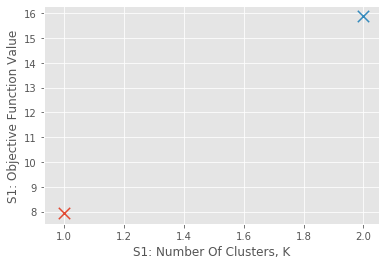

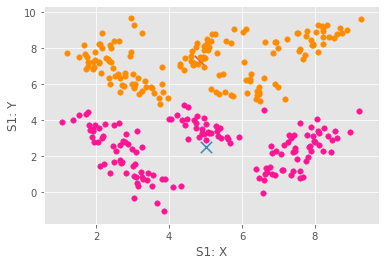

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  3
SUCCESSIVE OBJECTIVE VALUES:  [13.110854554912564, 26.221709109825127, 39.33256366473769]
//////////////////////////////////////////////////


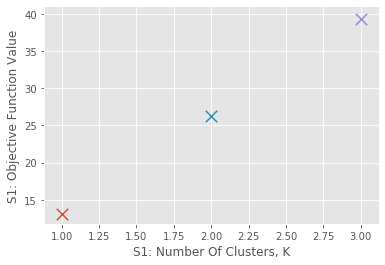

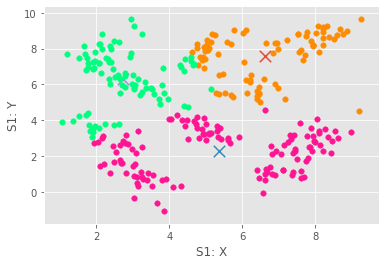

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  4
SUCCESSIVE OBJECTIVE VALUES:  [16.818326852694145, 33.63665370538829, 50.45498055808244, 67.27330741077658]
//////////////////////////////////////////////////


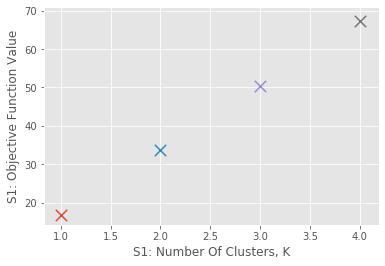

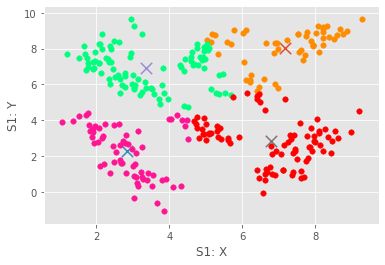

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  5
SUCCESSIVE OBJECTIVE VALUES:  [21.26994081373907, 42.53988162747814, 63.80982244121721, 85.07976325495628, 106.34970406869535]
//////////////////////////////////////////////////


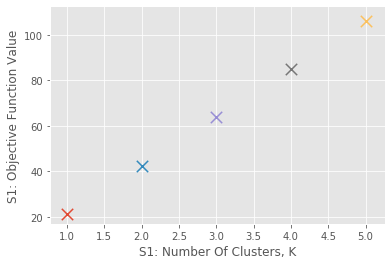

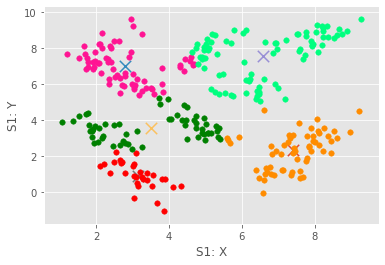

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  6
SUCCESSIVE OBJECTIVE VALUES:  [26.202841049596728, 52.405682099193456, 78.60852314879018, 104.81136419838691, 131.01420524798363, 157.21704629758034]
//////////////////////////////////////////////////


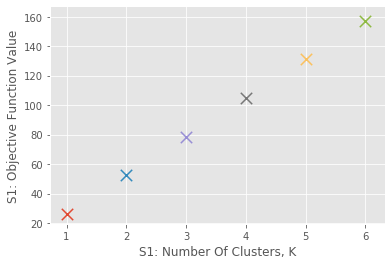

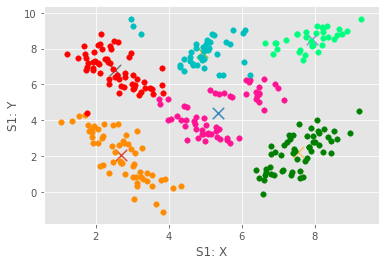

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  7
SUCCESSIVE OBJECTIVE VALUES:  [29.153775868247926, 58.30755173649585, 87.46132760474379, 116.6151034729917, 145.76887934123963, 174.92265520948754, 204.07643107773546]
//////////////////////////////////////////////////


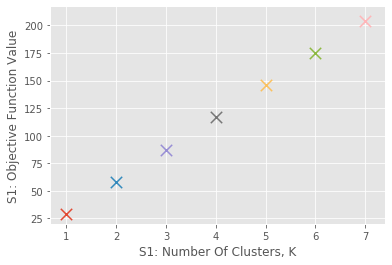

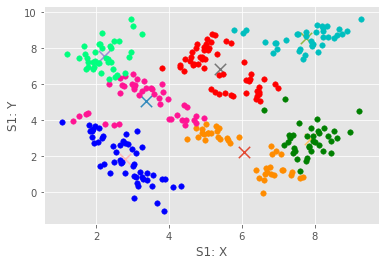

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  8
SUCCESSIVE OBJECTIVE VALUES:  [37.2726217934774, 74.5452435869548, 111.8178653804322, 149.0904871739096, 186.363108967387, 223.63573076086442, 260.90835255434183, 298.18097434781924]
//////////////////////////////////////////////////


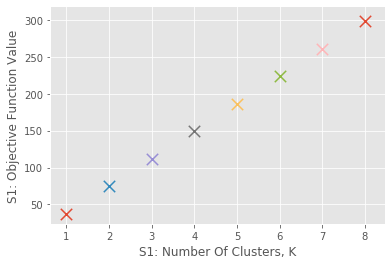

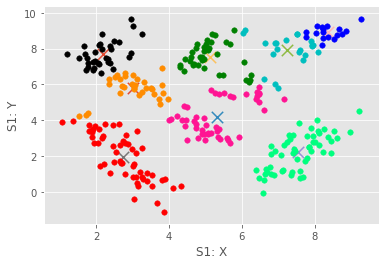

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  9
SUCCESSIVE OBJECTIVE VALUES:  [44.346126479007765, 88.69225295801553, 133.0383794370233, 177.38450591603106, 221.7306323950388, 266.07675887404656, 310.4228853530543, 354.76901183206206, 399.1151383110698]
//////////////////////////////////////////////////


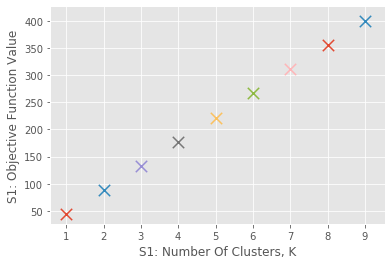

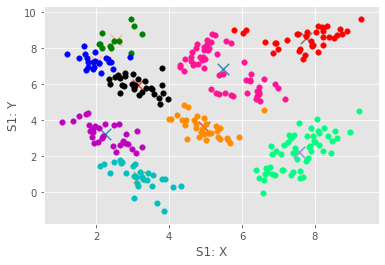

-------------------------------------------------------------------
Initialization # 1
STRATEGY # 1: Clusters =  10
SUCCESSIVE OBJECTIVE VALUES:  [43.53254042102084, 87.06508084204168, 130.59762126306254, 174.13016168408336, 217.6627021051042, 261.195242526125, 304.72778294714584, 348.26032336816667, 391.7928637891875, 435.3254042102083]
//////////////////////////////////////////////////


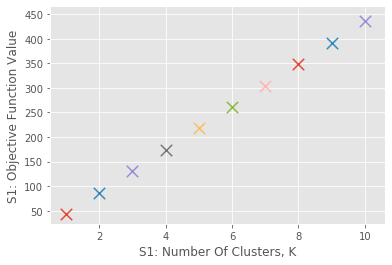

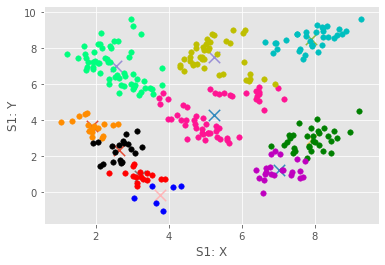

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  2
SUCCESSIVE OBJECTIVE VALUES:  [7.935147537261298, 15.870295074522597]
//////////////////////////////////////////////////


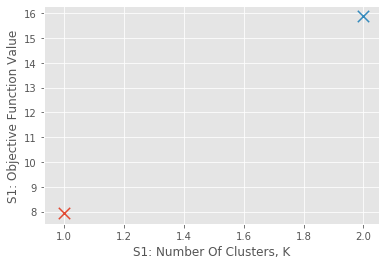

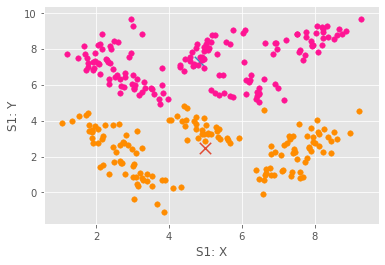

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  3
SUCCESSIVE OBJECTIVE VALUES:  [10.424545681709004, 20.849091363418008, 31.27363704512701]
//////////////////////////////////////////////////


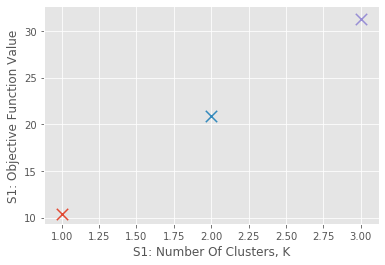

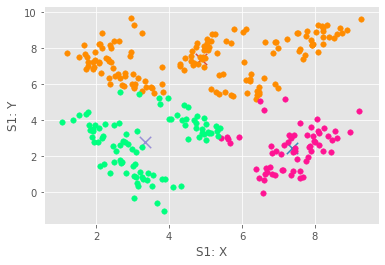

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  4
SUCCESSIVE OBJECTIVE VALUES:  [16.099696563617773, 32.199393127235545, 48.29908969085332, 64.39878625447109]
//////////////////////////////////////////////////


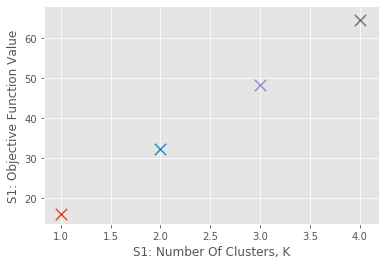

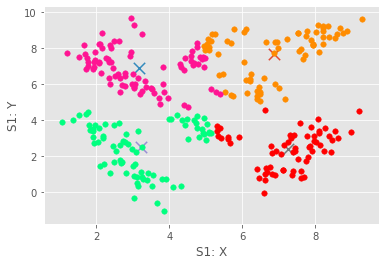

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  5
SUCCESSIVE OBJECTIVE VALUES:  [21.12733762811272, 42.25467525622544, 63.38201288433816, 84.50935051245088, 105.63668814056359]
//////////////////////////////////////////////////


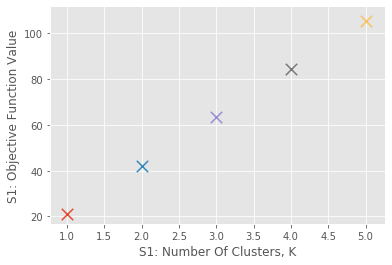

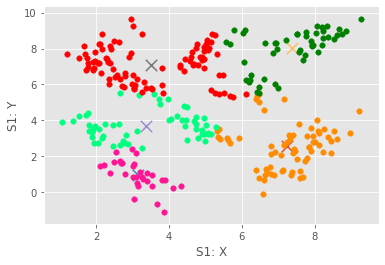

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  6
SUCCESSIVE OBJECTIVE VALUES:  [25.399674622975095, 50.79934924595019, 76.19902386892528, 101.59869849190038, 126.99837311487548, 152.39804773785056]
//////////////////////////////////////////////////


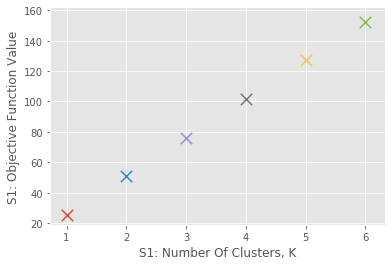

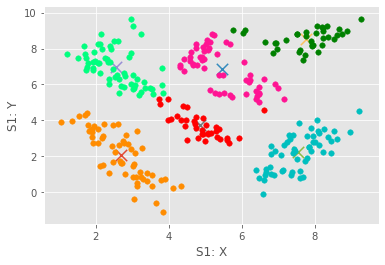

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  7
SUCCESSIVE OBJECTIVE VALUES:  [31.994228341948162, 63.988456683896324, 95.98268502584449, 127.97691336779265, 159.9711417097408, 191.96537005168898, 223.95959839363715]
//////////////////////////////////////////////////


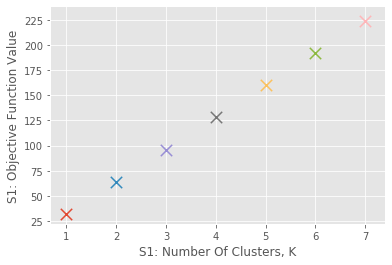

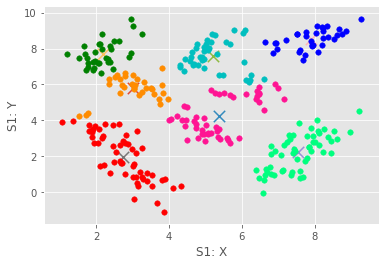

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  8
SUCCESSIVE OBJECTIVE VALUES:  [36.93612079657192, 73.87224159314384, 110.80836238971577, 147.74448318628768, 184.6806039828596, 221.6167247794315, 258.55284557600345, 295.48896637257536]
//////////////////////////////////////////////////


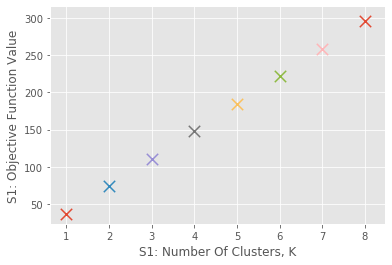

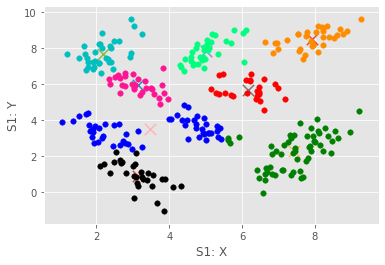

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  9
SUCCESSIVE OBJECTIVE VALUES:  [42.33169377988825, 84.6633875597765, 126.99508133966475, 169.326775119553, 211.65846889944123, 253.99016267932947, 296.3218564592177, 338.653550239106, 380.98524401899425]
//////////////////////////////////////////////////


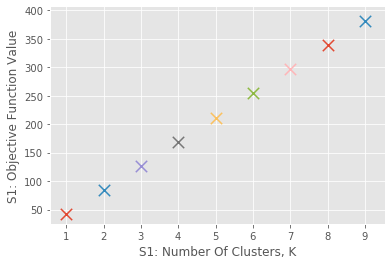

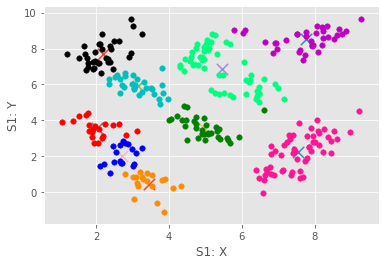

-------------------------------------------------------------------
Initialization # 2
STRATEGY # 1: Clusters =  10
SUCCESSIVE OBJECTIVE VALUES:  [37.72782755996983, 75.45565511993966, 113.1834826799095, 150.91131023987933, 188.63913779984915, 226.36696535981898, 264.0947929197888, 301.82262047975865, 339.5504480397285, 377.27827559969836]
//////////////////////////////////////////////////


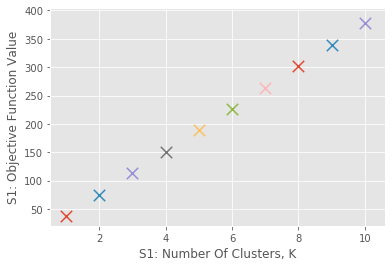

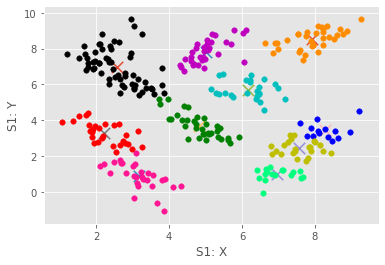

-------------------------------------------------------------------


In [426]:
def main():
    X = coordinatesArr

    # STRATEGY 1, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    for a in range(1,3):
        strategy1_execute(X, a)
        print("===================================================================")
    
    # STRATEGY 2, For Loop To Iterate from 2-10 Clusters, 2 runs for the whole thing
    """for b in range(1,3):
        strategy2_execute(X, b)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")"""

if __name__ == "__main__":
    main()